In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image=cv2.imread('/content/drive/MyDrive/CV/Images/megan.jpg')

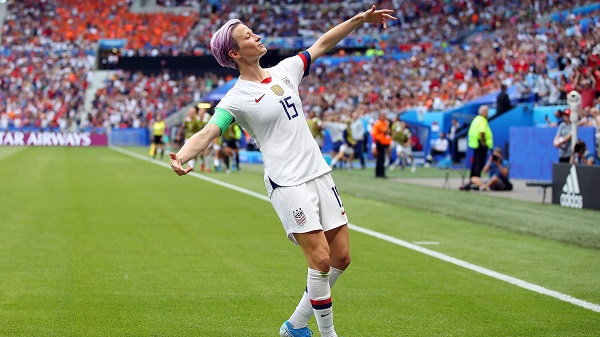

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape

(337, 600, 3)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
blob=cv2.dnn.blobFromImage(image=image,scalefactor=1.0/255,size=(image.shape[1],image.shape[0]))

In [ ]:
type(blob)

numpy.ndarray

In [ ]:
blob.shape

(1, 3, 337, 600)

In [ ]:
model=cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/CV/Weights/pose_deploy_linevec_faster_4_stages.prototxt','/content/drive/MyDrive/CV/Weights/pose_iter_160000.caffemodel')

In [14]:
model.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [15]:
model.setInput(blob)

In [16]:
output=model.forward()

In [17]:
output

array([[[[0.00055962, 0.00058117, 0.00053579, ..., 0.00046494,
          0.00052144, 0.00070126],
         [0.00056341, 0.00061412, 0.00052243, ..., 0.00043261,
          0.00049986, 0.00065831],
         [0.00053554, 0.00056641, 0.00048143, ..., 0.00043169,
          0.00049813, 0.00059231],
         ...,
         [0.00054603, 0.0005327 , 0.00055443, ..., 0.0004957 ,
          0.00050947, 0.00049164],
         [0.00056263, 0.00054248, 0.00058617, ..., 0.00050225,
          0.00053838, 0.00052778],
         [0.00057272, 0.00055983, 0.00060435, ..., 0.00051735,
          0.00056315, 0.00057202]],

        [[0.00111267, 0.00121808, 0.00114181, ..., 0.00090227,
          0.00107411, 0.00183264],
         [0.00109335, 0.00143293, 0.00105185, ..., 0.00084134,
          0.0009794 , 0.00163178],
         [0.00112441, 0.00127547, 0.00095223, ..., 0.0008397 ,
          0.00097065, 0.00120474],
         ...,
         [0.00107108, 0.00105736, 0.00109277, ..., 0.00099074,
          0.00102576, 0.0

In [18]:
output.shape

(1, 44, 43, 75)

In [21]:
output[0][1].shape

(43, 75)

In [23]:
image.shape

(337, 600, 3)

In [28]:
n_points=15
points=[]
threshold=0.1
for i in range(n_points):
  conf=output[0,i,:,:]
  _,confidence,_, point=cv2.minMaxLoc(conf)
  x=int((image.shape[1]*point[0])/75)
  y=int((image.shape[0]*point[1])/43)
  if confidence>threshold:
    cv2.circle(image,(x,y),5,(0,0,255),thickness=-1)
    cv2.putText(image,'{}'.format(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,255))
    points.append((x,y))
  else:
    points.append(None)

In [29]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

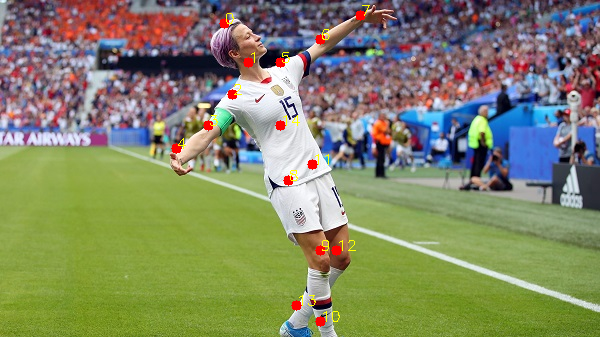

In [30]:
cv2_imshow(image)

In [31]:
lines=[[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]


In [32]:
lines

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [34]:
for i,line in enumerate(lines):
  A=points[line[0]]
  B=points[line[1]]
  cv2.line(image,A,B,(255,255,0))

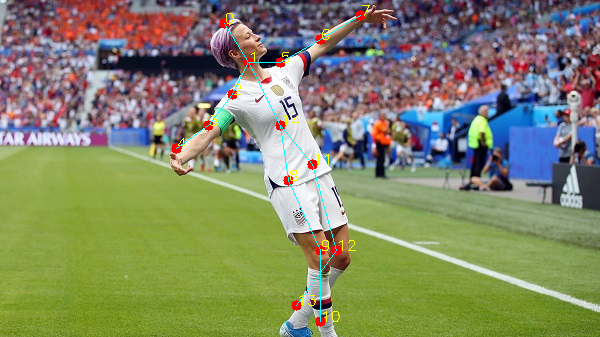

In [35]:
cv2_imshow(image)

Detecting Actions : Arms above the head or not

In [75]:
image=cv2.imread('/content/drive/MyDrive/CV/Images/player.jpg')

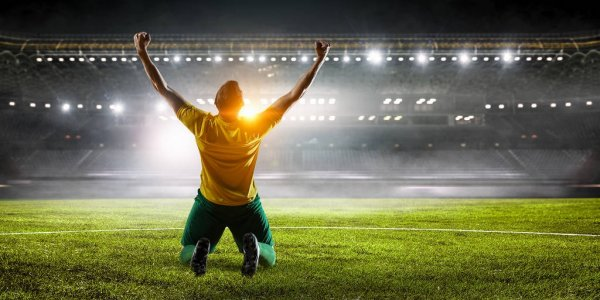

In [76]:
cv2_imshow(image)

In [77]:
def action(image):
  blob=cv2.dnn.blobFromImage(image,scalefactor=1.0/255,size=(image.shape[1],image.shape[0]))
  model.setInput(blob)
  output=model.forward()
  width=output.shape[3]
  height=output.shape[2]
  n_points=15
  points=[]
  threshold=0.1
  for i in range(n_points):
    conf=output[0,i,:,:]
    _,confidence,_,point=cv2.minMaxLoc(conf)
    x=int((image.shape[1]*point[0])/width)
    y=int((image.shape[0]*point[1])/height)
    if confidence>threshold:
      cv2.circle(image,(x,y),5,(255,255,0),thickness=-1)
      cv2.putText(image,text='{}'.format(i),org=(x,y-5),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=(0,255,255))
      points.append((x,y))
    else:
      points.append(None)
  lines=[[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]
  for i,line in enumerate(lines):
    A=points[line[0]]
    B=points[line[1]]
    cv2.line(image,A,B,(255,255,0))
  return image,points

In [78]:
img,pts=action(image)

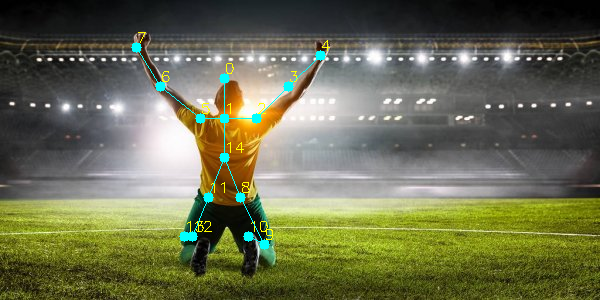

In [79]:
cv2_imshow(img)

In [80]:
pts

[(224, 78),
 (224, 118),
 (256, 118),
 (288, 86),
 (320, 55),
 (200, 118),
 (160, 86),
 (136, 47),
 (240, 197),
 (264, 244),
 (248, 236),
 (208, 197),
 (192, 236),
 (184, 236),
 (224, 157)]

In [113]:
test_image=cv2.imread('/content/drive/MyDrive/CV/Images/jump.jpg')

In [82]:
test_image_gesture,_=action(test_image)

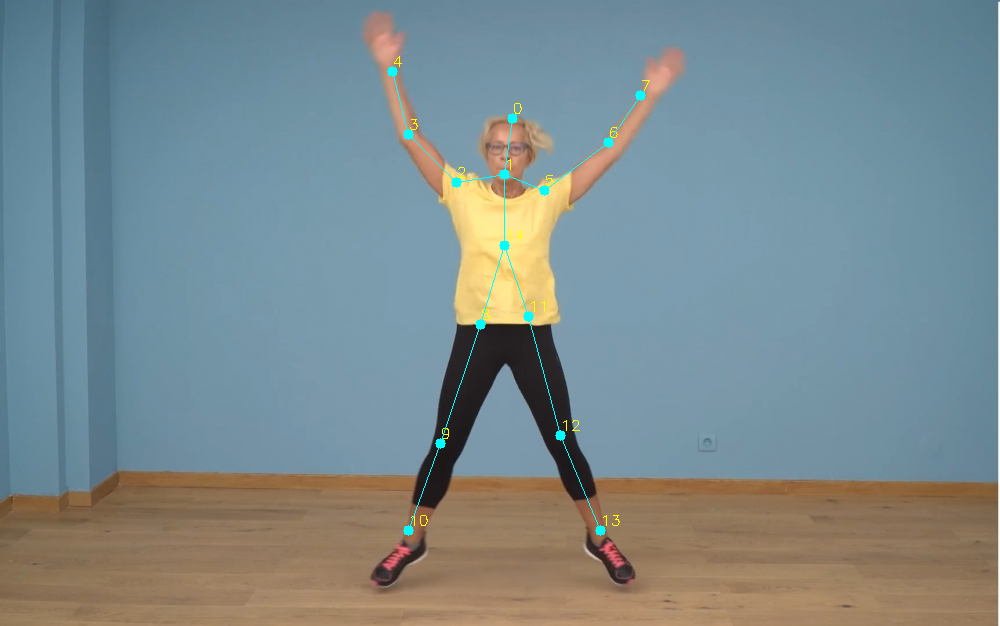

In [83]:
cv2_imshow(test_image_gesture)

In [114]:
def predict_gesture(image):
  result,points=action(image)
  left,right,head=points[7][1],points[4][1],points[0][1]
  if head>left and head>right:
    text='Arms are Up'
    cv2.putText(result,org=(10,20),text=text,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0))
  else:
    text='Arms are Down'
    cv2.putText(result,org=(10,10),text=text,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0))
  return result,text

In [115]:
result,text=predict_gesture(test_image)

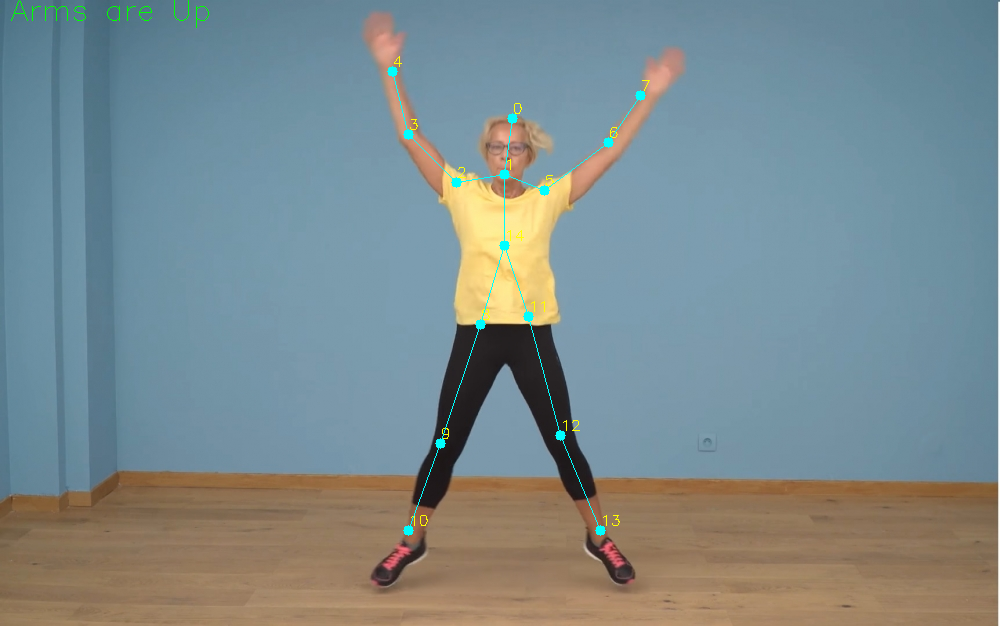

In [116]:
cv2_imshow(result)